In [1]:
import pandas as pd
unkai_df = pd.read_csv("./雲海2007.csv", header=1)
unkai_df.head()

,日付,出現,確率,閾値40,閾値50,閾値60,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2007/6/19,無,60%,空振り,空振り,空振り,テラスは雲中、トマム山山頂で雲海見えた（客談）,NaN,NaN,NaN,NaN,NaN
1,2007/6/20,無,50%,空振り,空振り,適中なし,とても寒く雲海無し,NaN,NaN,NaN,NaN,NaN
2,2007/6/21,無,50%,空振り,空振り,適中なし,雨で営業中止,NaN,NaN,NaN,NaN,NaN
3,2007/6/22,無,60%,空振り,空振り,空振り,曇り時々霧、６時過ぎに多少発生,NaN,NaN,NaN,NaN,NaN
4,2007/6/23,有,70%,適中,適中,適中,５時前後に雲海発生、5:30頃から雷雨で営業中止,NaN,NaN,NaN,NaN,NaN


In [2]:
target_df = unkai_df.loc[unkai_df["閾値40"] == "適中なし"]
target_df.head()

,日付,出現,確率,閾値40,閾値50,閾値60,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
10,2007/6/29,無,30%,適中なし,適中なし,適中なし,雲中、霧雨で7:00に営業中止,NaN,NaN,NaN,NaN,NaN
11,2007/6/30,無,30%,適中なし,適中なし,適中なし,雲中、霧雨で営業中止,NaN,NaN,NaN,NaN,NaN
32,2007/7/21,無,30%,適中なし,適中なし,適中なし,朝から霧で何も見えない。6時で中止,NaN,NaN,NaN,NaN,NaN
45,2007/8/3,無,20%,適中なし,適中なし,適中なし,雨の為中止,NaN,NaN,NaN,NaN,NaN
46,2007/8/4,無,20%,適中なし,適中なし,適中なし,〃,NaN,NaN,NaN,NaN,NaN


In [3]:
target_dates = target_df["日付"].to_numpy()
target_dates

array(['2007/6/29', '2007/6/30', '2007/7/21', '2007/8/3', '2007/8/4',
       '2007/8/22', '2007/9/4', '2007/9/5', '2007/9/7', '2007/9/16',
       '2007/9/18', '2007/9/28'], dtype=object)

In [4]:
def inquire_grib_data(path):
    import pygrib                  # gribファイルの中身を見たい場合はinquire_grib_data(path)を実行                
    grbs = pygrib.open(path)
    for grb in grbs:
        print(grb)
    return
def read_grib_data(path,name=None,level=None):
    import numpy as np
    import pygrib                   # pygribは!pip3 install pygrib --userでインストール
    grbs = pygrib.open(path)

    if name != None:                # anl_surf125に対しては変数名を与える
        alines = grbs.select(name=name)
    elif level != None:             # anl_p125に対しては気圧面を与えるとその水平面データ
        alines = grbs.select(level=level)
    else:                           #                  気圧面を与えないと全３次元データ
        alines = grbs.select()

    lat, lon = alines[0].latlons()  # lonは経度、latは緯度データ: (ny,nx)の２次元格子です
    ny, nx = lat.shape
    nline = len(alines)
    gdata = np.empty( (nline,ny,nx), dtype = "f4" )
    levels = np.empty( (nline), dtype = "f4" )
    for iline, aline in enumerate(alines):
        gdata[iline,:,:] = aline.values[::-1,:]
        levels[iline] = aline["level"]

    return lon, lat[::-1], level, gdata

In [5]:
import datetime as dt
import calendar as cal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dts=[]
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2007,month)[1]
    dts.extend([dt.datetime(2007,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均

parameter_counts = 4
slpm=np.zeros((len(dts),145,288, parameter_counts)) #データの置き場所をつくる
#slpm[target_idxes, :, :] /= 100

for i,dt in enumerate(dts):
    fdir = "/mnt/hwmet-hdd01/Database/JRA55/anl_p125/"
    fname = "/anl_surf125."
    path=dt.strftime(fdir+"%Y%m"+fname+"%Y%m%d%H")
    lon,lat,_,SLP0=read_grib_data(path,name="Mean sea level pressure")
    lon,lat,_, u_wind = read_grib_data(path, name="10 metre U wind component")
    lon,lat,_, v_wind = read_grib_data(path,name="10 metre V wind component")
    slpm[i, :, :, 1] = SLP0
    slpm[i, :, :, 2] = u_wind
    slpm[i, :, :, 3] = v_wind

target_idxes = []
for idx, d in enumerate(dts):
    string_dt = f"{d.year}/{d.month}/{d.day}"
    if string_dt in target_dates:
#         print(idx, string_dt)
        target_idxes.append(idx)

slpm[target_idxes, :, :, 1] /= 100
print(target_idxes)

/home/konagai/.local/lib/python3.6/site-packages/pyproj/__init__.py:76: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


[716, 717, 718, 719, 720, 721, 722, 723, 804, 805, 806, 807, 856, 857, 858, 859, 860, 861, 862, 863, 932, 933, 934, 935, 984, 985, 986, 987, 988, 989, 990, 991, 996, 997, 998, 999, 1032, 1033, 1034, 1035, 1040, 1041, 1042, 1043, 1080, 1081, 1082, 1083]


In [6]:
mean = np.mean(slpm[target_idxes, :, :, 1], axis=0)
mean

array([[1034.30967285, 1034.30967285, 1034.30967285, ..., 1034.30967285,
        1034.30967285, 1034.30967285],
       [1032.6885791 , 1032.6885791 , 1032.91318848, ..., 1032.31292806,
        1032.46592285, 1032.6885791 ],
       [1031.02581868, 1031.06748535, 1031.81032389, ..., 1030.14300618,
        1030.21852702, 1030.98610514],
       ...,
       [1012.48219889, 1012.48350098, 1012.50498535, ..., 1012.46852702,
        1012.4698291 , 1012.48219889],
       [1013.39886556, 1013.39886556, 1013.40928223, ..., 1013.3917041 ,
        1013.39300618, 1013.39886556],
       [1014.45355306, 1014.45355306, 1014.45355306, ..., 1014.45355306,
        1014.45355306, 1014.45355306]])

In [7]:
mean2 = np.mean(slpm[target_idxes, :, :, 2], axis=0)
mean2

array([[-3.62921302, -3.55727291, -3.48110104, ..., -3.84015052,
        -3.77211666, -3.7024552 ],
       [-5.49477291, -5.49477291, -5.31671302, ..., -5.78123124,
        -5.65102291, -5.49477291],
       [-6.03643958, -6.02211666, -5.61261145, ..., -6.47654374,
        -6.4273901 , -6.05076249],
       ...,
       [-2.30824947, -2.31150468, -2.36554114, ..., -2.23956458,
        -2.24509843, -2.30466874],
       [-2.31475989, -2.31475989, -2.31541093, ..., -2.29262447,
        -2.30369218, -2.31475989],
       [-2.16013749, -2.18650468, -2.21319739, ..., -2.07127031,
        -2.10219479, -2.13116614]])

In [8]:
mean3 = np.mean(slpm[target_idxes, :, :, 3], axis=0)
mean3

array([[-3.33529027, -3.41341527, -3.49023819, ..., -3.08919652,
        -3.17383194, -3.25423559],
       [-3.89811579, -3.89811579, -4.1435585 , ..., -3.36165746,
        -3.62370173, -3.89811579],
       [-4.75000381, -4.75814184, -5.08984756, ..., -4.30501684,
        -4.36002986, -4.74154027],
       ...,
       [-0.28483454, -0.28157934, -0.17708715, ..., -0.3997434 ,
        -0.38444392, -0.28971736],
       [-0.31868871, -0.31868871, -0.22038142, ..., -0.53223038,
        -0.42155329, -0.31868871],
       [-1.27181371, -1.22558975, -1.17708715, ..., -1.41146215,
        -1.36458715, -1.31868871]])

977.0622770182291 1045.7771207682292


/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:385: ShapelyDep

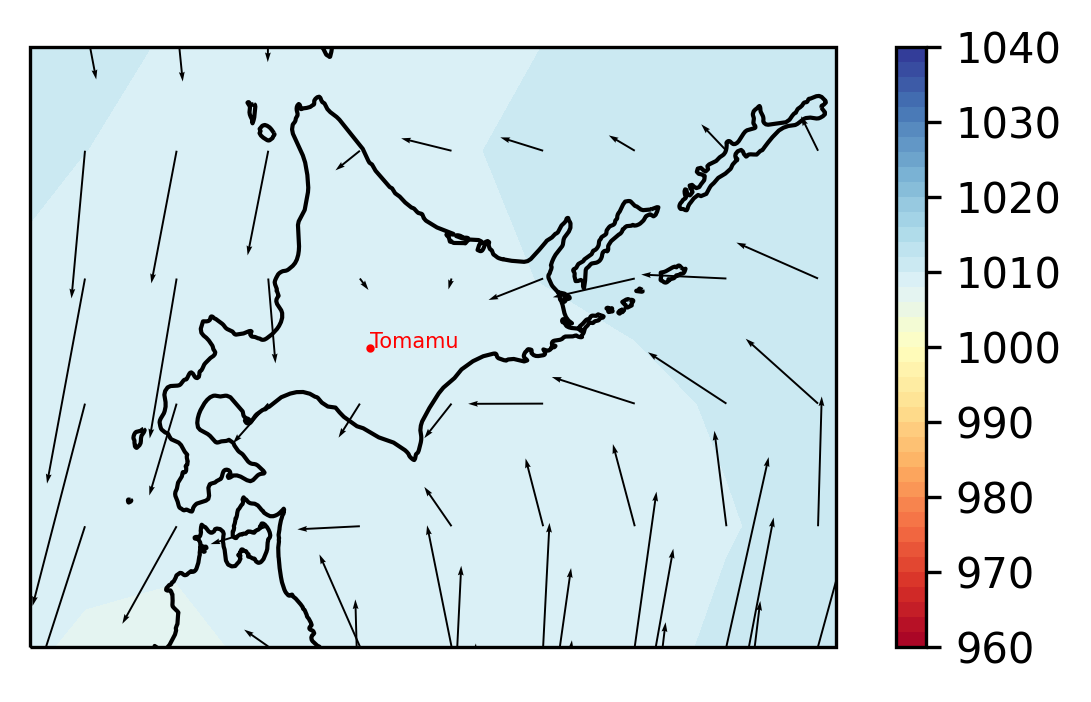

In [9]:
def draw_graph(xmesh,ymesh,topo_data):
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    fig = plt.figure( figsize = (5,2.5), dpi = 300 )
    proj = ccrs.Mercator(central_longitude=140)
    proj_cart = ccrs.PlateCarree()
    ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
    ax.set_extent([120,160,25,50],crs=proj_cart)
#   ax.set_extent([-179.99,180,-80,80],crs=proj_cart)
    ax.coastlines()
    
    C = ax.contourf(xmesh,ymesh,topo_data,cmap="RdYlBu",transform=proj_cart)
    fig.colorbar(C)
    return ax

# ax = draw_graph(lon,lat,mean)

xmesh, ymesh, topo_data = lon, lat, mean 

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure( figsize = (5,2.5), dpi = 300 )
proj = ccrs.Mercator(central_longitude=140)
proj_cart = ccrs.PlateCarree()
ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
ax.set_extent([138,149,40,46],crs=proj_cart)
ax.coastlines()

lat_tomamu = 43.0631836
lon_tomamu = 142.6316828
ax.plot(lon_tomamu, lat_tomamu, 'o', transform=ccrs.PlateCarree(),markersize=1, color='r')
plt.text(lon_tomamu, lat_tomamu, 'Tomamu', size=5, color='red',horizontalalignment='left', transform=ccrs.PlateCarree())

# fig.savefig("適中の日の平均風向")

###等高線と色付け
# Cmap: RdYlBu
min_press, max_press = topo_data.min(), topo_data.max()
print(min_press, max_press)
levels = np.arange(960.0, 1040.1, 2.0)
C = ax.contourf(xmesh,ymesh,topo_data, levels=levels, cmap="RdYlBu",transform=proj_cart)
fig.colorbar(C)
colors = ['black']
# mappable = ax.contour(lon,lat,mean,levels=levels, colors=["black"], extend='both', transform=ccrs.PlateCarree())
# 等圧線の数値表示
# ax.clabel(mappable, fontsize=2, fmt="%4.0f", inline=False)

###風
ax.quiver(lon, lat, mean2, mean3, scale=5, scale_units="inches", transform=ccrs.PlateCarree())


ax.set_extent([138,149,40,46],crs=proj_cart)
# ax.gridlines(draw_labels=True)
plt.savefig("適中なし天気図.png")
plt.show()
plt.close()
#draw_graph(lon,lat,mean)